<a href="https://colab.research.google.com/github/ce3tnia/DataMining/blob/master/TugasProjectUAS_DataMining_Kelompok2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Upload Dataset Ke Google Colab

In [ ]:
from google.colab import files
uploaded = files.upload()

Import Library Yang Dibutuhkan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.metrics import confusion_matrix
import itertools

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


Melihat Isi Dataset

In [ ]:
path = 'indeks-standar-pencemar-udara-di-spku.csv'
df = pd.read_csv(path)
df.head(10) 

,tanggal,stasiun,pm10,so2,co,o3,no2,max,critical,categori
0,2020-01-01,DKI1 (Bunderan HI),30.0,20.0,10.0,32.0,9.0,32,O3,BAIK
1,2020-01-02,DKI1 (Bunderan HI),27.0,22.0,12.0,29.0,8.0,29,O3,BAIK
2,2020-01-03,DKI1 (Bunderan HI),39.0,22.0,14.0,32.0,10.0,39,PM10,BAIK
3,2020-01-04,DKI1 (Bunderan HI),34.0,22.0,14.0,38.0,10.0,38,O3,BAIK
4,2020-01-05,DKI1 (Bunderan HI),35.0,22.0,12.0,31.0,9.0,35,PM10,BAIK
5,2020-01-06,DKI1 (Bunderan HI),46.0,23.0,16.0,32.0,9.0,46,PM10,BAIK
6,2020-01-07,DKI1 (Bunderan HI),37.0,23.0,26.0,33.0,11.0,37,PM10,BAIK
7,2020-01-08,DKI1 (Bunderan HI),41.0,26.0,20.0,30.0,11.0,41,PM10,BAIK
8,2020-01-09,DKI1 (Bunderan HI),52.0,23.0,29.0,24.0,12.0,52,PM10,SEDANG
9,2020-01-10,DKI1 (Bunderan HI),24.0,24.0,18.0,25.0,8.0,25,O3,BAIK


In [ ]:
df.tail(10)

,tanggal,stasiun,pm10,so2,co,o3,no2,max,critical,categori
740,2020-06-16,DKI5 (Kebon Jeruk) Jakarta Barat,57.0,17.0,10.0,59.0,9.0,59,O3,SEDANG
741,2020-06-17,DKI5 (Kebon Jeruk) Jakarta Barat,52.0,13.0,13.0,73.0,8.0,73,O3,SEDANG
742,2020-06-18,DKI5 (Kebon Jeruk) Jakarta Barat,57.0,15.0,14.0,79.0,9.0,79,O3,SEDANG
743,2020-06-19,DKI5 (Kebon Jeruk) Jakarta Barat,57.0,11.0,12.0,75.0,7.0,75,O3,SEDANG
744,2020-06-20,DKI5 (Kebon Jeruk) Jakarta Barat,60.0,12.0,19.0,92.0,13.0,92,O3,SEDANG
745,2020-06-21,DKI5 (Kebon Jeruk) Jakarta Barat,57.0,12.0,14.0,90.0,8.0,90,O3,SEDANG
746,2020-06-22,DKI5 (Kebon Jeruk) Jakarta Barat,59.0,15.0,12.0,65.0,9.0,65,O3,SEDANG
747,2020-06-23,DKI5 (Kebon Jeruk) Jakarta Barat,49.0,13.0,15.0,69.0,12.0,69,O3,SEDANG
748,2020-06-24,DKI5 (Kebon Jeruk) Jakarta Barat,52.0,11.0,11.0,85.0,13.0,85,O3,SEDANG
749,2020-06-25,DKI5 (Kebon Jeruk) Jakarta Barat,76.0,16.0,38.0,85.0,17.0,85,O3,SEDANG


In [ ]:
df.shape

(750, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tanggal   750 non-null    object 
 1   stasiun   750 non-null    object 
 2   pm10      732 non-null    float64
 3   so2       722 non-null    float64
 4   co        735 non-null    float64
 5   o3        742 non-null    float64
 6   no2       717 non-null    float64
 7   max       750 non-null    int64  
 8   critical  746 non-null    object 
 9   categori  750 non-null    object 
dtypes: float64(5), int64(1), object(4)
memory usage: 58.7+ KB


In [ ]:
df.isnull().sum()

tanggal      0
stasiun      0
pm10        18
so2         28
co          15
o3           8
no2         33
max          0
critical     4
categori     0
dtype: int64

In [ ]:
df.loc[df['categori'] == 'TIDAK ADA DATA']

,tanggal,stasiun,pm10,so2,co,o3,no2,max,critical,categori
197,2020-02-14,DKI2 (Kelapa Gading),NaN,NaN,NaN,NaN,NaN,0,NaN,TIDAK ADA DATA
248,2020-02-07,DKI4 (Lubang Buaya),NaN,NaN,NaN,NaN,NaN,0,NaN,TIDAK ADA DATA
573,2020-05-31,DKI4 (Lubang Buaya),NaN,NaN,NaN,NaN,NaN,0,NaN,TIDAK ADA DATA
704,2020-06-06,DKI4 (Lubang Buaya),NaN,NaN,NaN,NaN,NaN,0,NaN,TIDAK ADA DATA


Menghapus Variabel Yang Tidak Dibutuhkan, Menghapus Kolom Data Yang Tidak Memiliki Data Dan Mengisi Nilai Kosong Dengan Nilai Rata"

In [ ]:
df = df.drop(['tanggal','stasiun','max','critical'],axis=1)
df = df.fillna(df.mean())
df = df.drop(df[df['categori']=='TIDAK ADA DATA'].index)
df.head()

,pm10,so2,co,o3,no2,categori
0,30.0,20.0,10.0,32.0,9.0,BAIK
1,27.0,22.0,12.0,29.0,8.0,BAIK
2,39.0,22.0,14.0,32.0,10.0,BAIK
3,34.0,22.0,14.0,38.0,10.0,BAIK
4,35.0,22.0,12.0,31.0,9.0,BAIK


In [ ]:
df.isnull().sum()

pm10        0
so2         0
co          0
o3          0
no2         0
categori    0
dtype: int64

In [ ]:
df.shape

(746, 6)

In [ ]:
df.describe()

,pm10,so2,co,o3,no2
count,746.000000,746.000000,746.000000,746.000000,746.000000
mean,50.321038,15.943213,17.493878,58.715633,7.917713
std,14.198760,8.432334,10.310855,23.783108,3.390501
min,5.000000,1.000000,3.000000,16.000000,2.000000
25%,40.000000,9.000000,11.000000,42.000000,5.000000
50%,51.000000,15.943213,15.000000,56.000000,7.917713
75%,60.000000,21.750000,22.000000,72.000000,9.000000
max,111.000000,60.000000,75.000000,191.000000,23.000000


SEDANG         513
BAIK           196
TIDAK SEHAT     37
Name: categori, dtype: int64


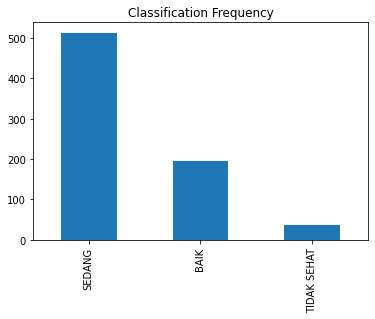

In [ ]:
df['categori'].value_counts().plot.bar(title='Classification Frequency')
print(df['categori'].value_counts())

Melakukan Label Encoding

In [ ]:
cleanup = {'categori': {'BAIK': 1.0, 'SEDANG': 2.0, 'TIDAK SEHAT': 3.0}}
df.replace(cleanup, inplace=True)
df.head(10)

,pm10,so2,co,o3,no2,categori
0,30.0,20.0,10.0,32.0,9.0,1.0
1,27.0,22.0,12.0,29.0,8.0,1.0
2,39.0,22.0,14.0,32.0,10.0,1.0
3,34.0,22.0,14.0,38.0,10.0,1.0
4,35.0,22.0,12.0,31.0,9.0,1.0
5,46.0,23.0,16.0,32.0,9.0,1.0
6,37.0,23.0,26.0,33.0,11.0,1.0
7,41.0,26.0,20.0,30.0,11.0,1.0
8,52.0,23.0,29.0,24.0,12.0,2.0
9,24.0,24.0,18.0,25.0,8.0,1.0


Melakukan Normalisasi

In [ ]:
x = df.drop('categori',axis=1)
y = df['categori']
df.head()
print(x)
column_name = list(x.columns) 

     pm10   so2    co    o3   no2
0    30.0  20.0  10.0  32.0   9.0
1    27.0  22.0  12.0  29.0   8.0
2    39.0  22.0  14.0  32.0  10.0
3    34.0  22.0  14.0  38.0  10.0
4    35.0  22.0  12.0  31.0   9.0
..    ...   ...   ...   ...   ...
745  57.0  12.0  14.0  90.0   8.0
746  59.0  15.0  12.0  65.0   9.0
747  49.0  13.0  15.0  69.0  12.0
748  52.0  11.0  11.0  85.0  13.0
749  76.0  16.0  38.0  85.0  17.0

[746 rows x 5 columns]


In [ ]:
df.isnull().sum()

pm10        0
so2         0
co          0
o3          0
no2         0
categori    0
dtype: int64

In [ ]:
scaler = MinMaxScaler() 
data_scaled = scaler.fit_transform(x)
print('Min : ', data_scaled.min(axis=0))
print('Max : ', data_scaled.max(axis=0))
print('Means : ', data_scaled.mean(axis=0))
print('Deviation Standard : ', data_scaled.std(axis=0))

Min :  [0. 0. 0. 0. 0.]
Max :  [1. 1. 1. 1. 1.]
Means :  [0.42755696 0.2532748  0.20130385 0.24408933 0.28179584]
Deviation Standard :  [0.13386075 0.14282509 0.1431103  0.13581236 0.16134418]


In [ ]:
df = pd.DataFrame(data=data_scaled, columns= column_name)
df = pd.concat([df, y],axis=1)
df = df.dropna()
df.head(10)

,pm10,so2,co,o3,no2,categori
0,0.235849,0.322034,0.097222,0.091429,0.333333,1.0
1,0.207547,0.355932,0.125000,0.074286,0.285714,1.0
2,0.320755,0.355932,0.152778,0.091429,0.380952,1.0
3,0.273585,0.355932,0.152778,0.125714,0.380952,1.0
4,0.283019,0.355932,0.125000,0.085714,0.333333,1.0
5,0.386792,0.372881,0.180556,0.091429,0.333333,1.0
6,0.301887,0.372881,0.319444,0.097143,0.428571,1.0
7,0.339623,0.423729,0.236111,0.080000,0.428571,1.0
8,0.443396,0.372881,0.361111,0.045714,0.476190,2.0
9,0.179245,0.389831,0.208333,0.051429,0.285714,1.0


In [ ]:
df.tail(10)

,pm10,so2,co,o3,no2,categori
736,0.490566,0.271186,0.097222,0.245714,0.333333,2.0
737,0.443396,0.203390,0.138889,0.325714,0.285714,2.0
738,0.490566,0.237288,0.152778,0.360000,0.333333,2.0
739,0.490566,0.169492,0.125000,0.337143,0.238095,2.0
740,0.518868,0.186441,0.222222,0.434286,0.523810,2.0
741,0.490566,0.186441,0.152778,0.422857,0.285714,2.0
742,0.509434,0.237288,0.125000,0.280000,0.333333,2.0
743,0.415094,0.203390,0.166667,0.302857,0.476190,2.0
744,0.443396,0.169492,0.111111,0.394286,0.523810,2.0
745,0.669811,0.254237,0.486111,0.394286,0.714286,2.0


In [ ]:
df.isnull().sum()

pm10        0
so2         0
co          0
o3          0
no2         0
categori    0
dtype: int64

In [ ]:
df.corr()

,pm10,so2,co,o3,no2,categori
pm10,1.000000,0.257970,0.201953,0.228418,0.143338,0.304465
so2,0.257970,1.000000,0.142414,0.045795,-0.209748,0.116110
co,0.201953,0.142414,1.000000,0.055769,0.148329,0.033577
o3,0.228418,0.045795,0.055769,1.000000,-0.064311,0.362278
no2,0.143338,-0.209748,0.148329,-0.064311,1.000000,-0.066198
categori,0.304465,0.116110,0.033577,0.362278,-0.066198,1.000000


Data Sebelum Dilakukan Outlier Remove

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-package

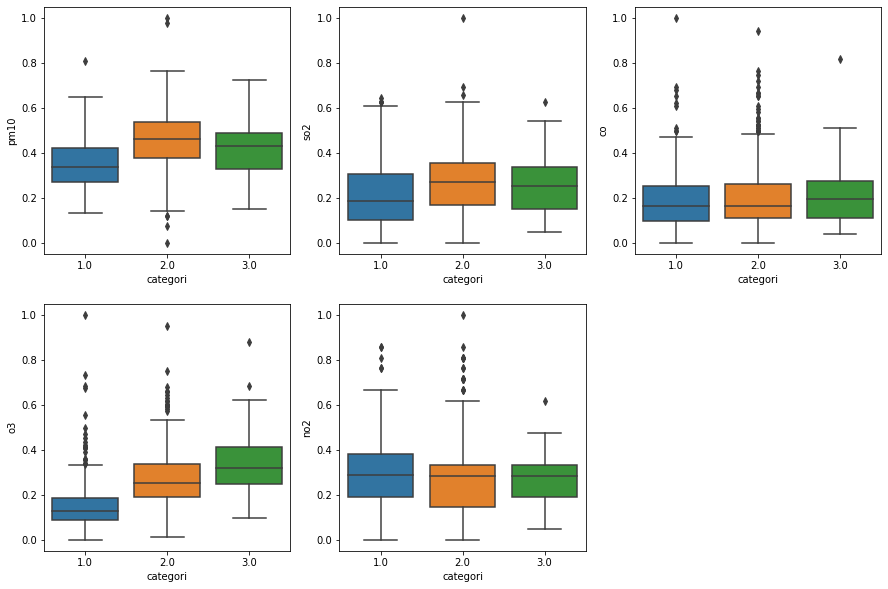

In [ ]:
plt.figure(figsize=(15,10))

plt.subplot(231)
sns.boxplot(df["categori"],df["pm10"])
plt.subplot(232)
sns.boxplot(df["categori"],df["so2"])
plt.subplot(233)
sns.boxplot(df["categori"],df["co"])
plt.subplot(234)
sns.boxplot(df["categori"],df["o3"])
plt.subplot(235)
sns.boxplot(df["categori"],df["no2"])

plt.show()

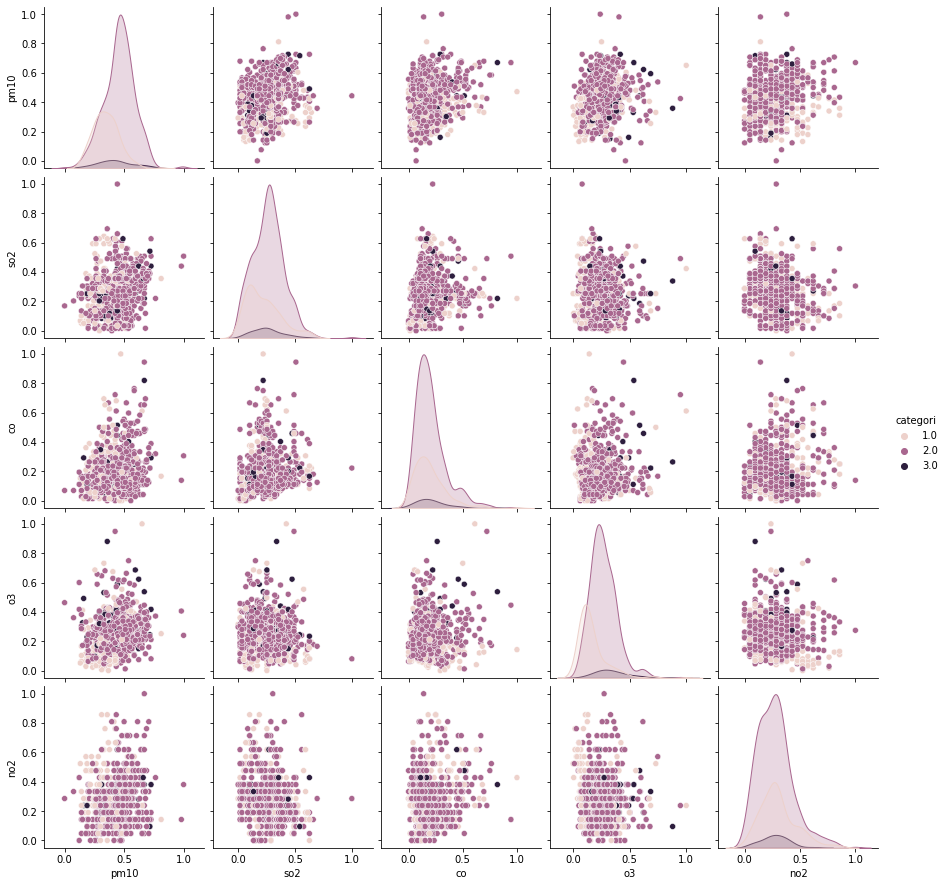

In [ ]:
sns.pairplot(df, hue="categori")

Outlier Remove

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df_out = df[~((df < (Q1 - 1.5 * IQR))|(df > (Q3 + 1.5 * IQR))).any(axis=1)]

print(IQR)

pm10        0.188679
so2         0.203390
co          0.152778
o3          0.171429
no2         0.190476
categori    1.000000
dtype: float64


Data Setelah Dilakukan Outlier Remove

In [ ]:
df_out.head(10)

,pm10,so2,co,o3,no2,categori
0,0.235849,0.322034,0.097222,0.091429,0.333333,1.0
1,0.207547,0.355932,0.125000,0.074286,0.285714,1.0
2,0.320755,0.355932,0.152778,0.091429,0.380952,1.0
3,0.273585,0.355932,0.152778,0.125714,0.380952,1.0
4,0.283019,0.355932,0.125000,0.085714,0.333333,1.0
5,0.386792,0.372881,0.180556,0.091429,0.333333,1.0
6,0.301887,0.372881,0.319444,0.097143,0.428571,1.0
7,0.339623,0.423729,0.236111,0.080000,0.428571,1.0
8,0.443396,0.372881,0.361111,0.045714,0.476190,2.0
9,0.179245,0.389831,0.208333,0.051429,0.285714,1.0


In [ ]:
df_out.tail(10)

,pm10,so2,co,o3,no2,categori
735,0.518868,0.203390,0.097222,0.451429,0.285714,2.0
736,0.490566,0.271186,0.097222,0.245714,0.333333,2.0
737,0.443396,0.203390,0.138889,0.325714,0.285714,2.0
738,0.490566,0.237288,0.152778,0.360000,0.333333,2.0
739,0.490566,0.169492,0.125000,0.337143,0.238095,2.0
740,0.518868,0.186441,0.222222,0.434286,0.523810,2.0
741,0.490566,0.186441,0.152778,0.422857,0.285714,2.0
742,0.509434,0.237288,0.125000,0.280000,0.333333,2.0
743,0.415094,0.203390,0.166667,0.302857,0.476190,2.0
744,0.443396,0.169492,0.111111,0.394286,0.523810,2.0


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-package

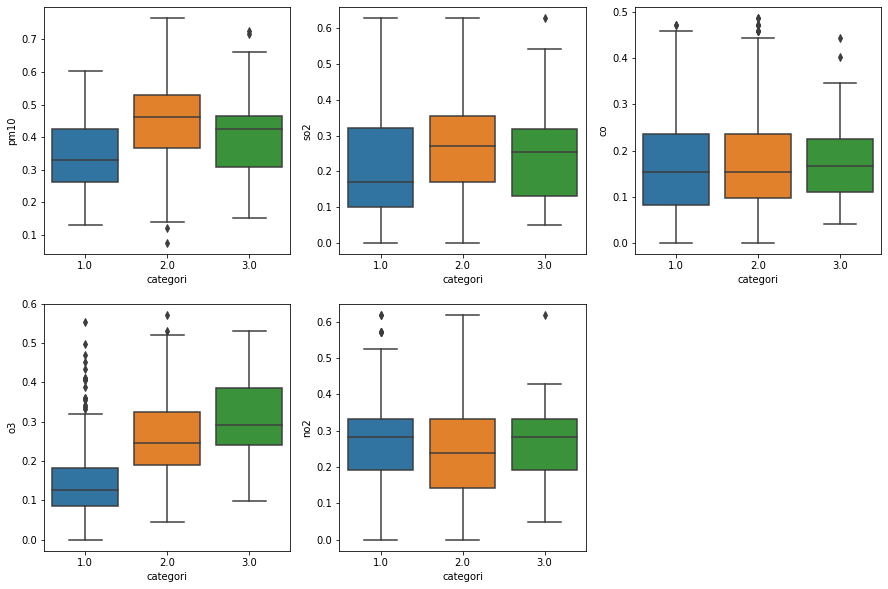

In [ ]:
plt.figure(figsize=(15,10))

plt.subplot(231)
sns.boxplot(df_out["categori"],df_out["pm10"])
plt.subplot(232)
sns.boxplot(df_out["categori"],df_out["so2"])
plt.subplot(233)
sns.boxplot(df_out["categori"],df_out["co"])
plt.subplot(234)
sns.boxplot(df_out["categori"],df_out["o3"])
plt.subplot(235)
sns.boxplot(df_out["categori"],df_out["no2"])

plt.show()

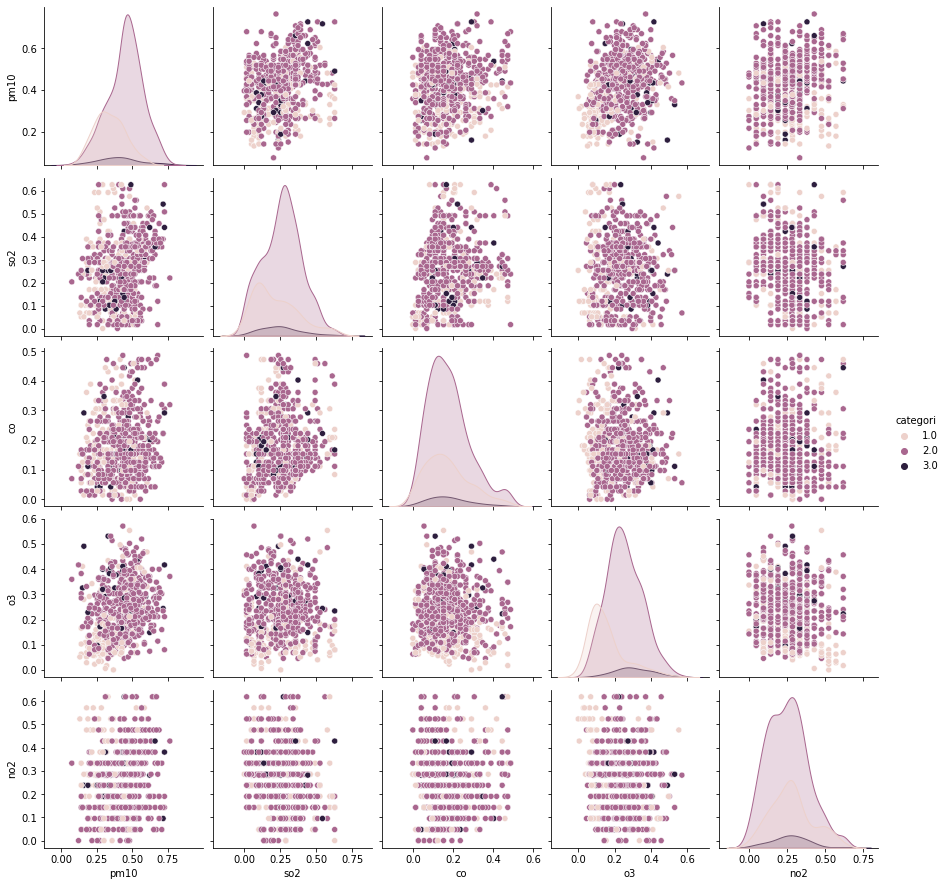

In [ ]:
sns.pairplot(df_out, hue="categori")

Reduksi Dimensi

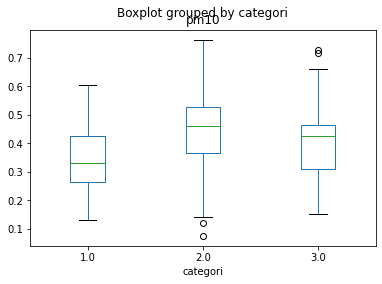

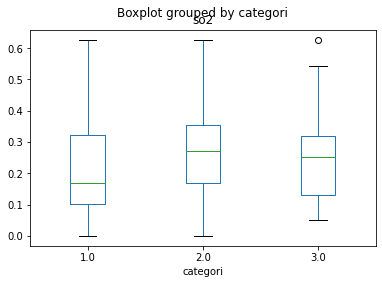

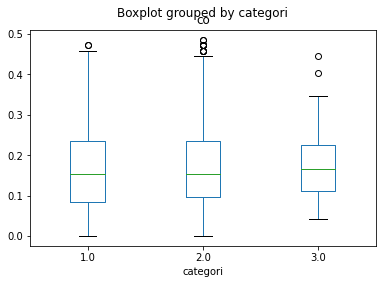

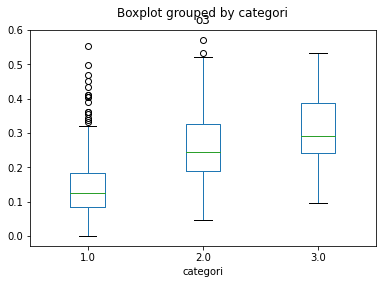

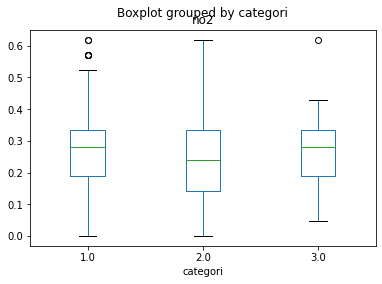

In [ ]:
X_fix = df_out.drop("categori",1)
y_fix = df_out["categori"]
columns_name = list(X_fix.columns)
for i in column_name:
  df_out.boxplot(by ='categori', column =[i], grid = False) 

In [ ]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_fix)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
df_final = pd.concat([principalDf, y_fix], axis = 1)
df_final.head()

,principal component 1,principal component 2,categori
0,-0.099608,-0.089270,1.0
1,-0.068095,-0.145761,1.0
2,-0.039692,0.001394,1.0
3,-0.054294,-0.021703,1.0
4,-0.047489,-0.061772,1.0


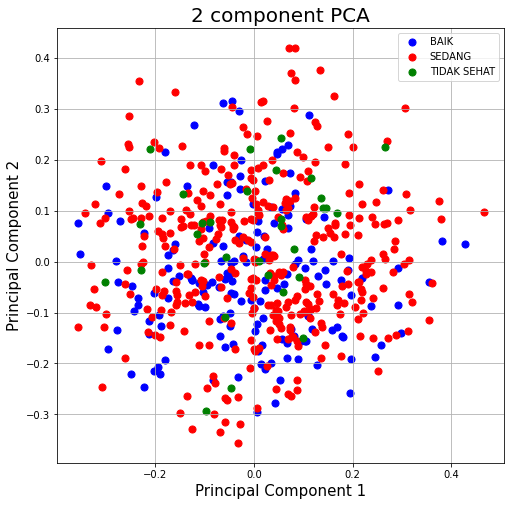

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [1.0,2.0,3.0]
colors = ['b', 'r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = df_final['categori'] == target
    ax.scatter(df_final.loc[indicesToKeep, 'principal component 1']
               , df_final.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(["BAIK", "SEDANG", "TIDAK SEHAT"])
ax.grid()

Ranking Score

In [ ]:
X = df_out.iloc[:,0:6]
y = df_out.iloc[:,-1]

bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(X_fix,y_fix)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_fix.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Name','Score']
print(featureScores.nlargest(6,'Score'))

   Name     Score
3    o3  5.839587
0  pm10  3.674185
1   so2  0.892040
4   no2  0.338275
2    co  0.034293


Classification

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=55)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [ ]:
x = df_out.drop("categori",1)
y = df_out["categori"]
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3)
len(x_test), len(x_train)

(197, 459)

Oversampling

In [ ]:
smote = SMOTE()
x_train_res, y_train_res = smote.fit_sample(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Random Forest Tanpa Oversampling

In [ ]:
model_rf = RandomForestClassifier()
model_rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
pred_rf = model_rf.predict(x_test)
accuracy = (pred_rf == y_test).sum()/len(y_test)
accuracy

0.8121827411167513

[[ 33  11   0]
 [ 16 127  10]
 [  0   0   0]]


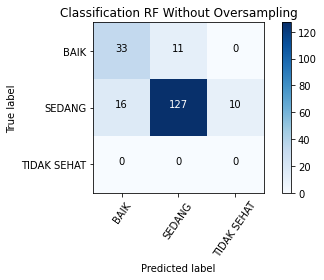

In [ ]:
cm = confusion_matrix(pred_rf, y_test)
cm_plot_label =['BAIK', 'SEDANG', 'TIDAK SEHAT']
plot_confusion_matrix(cm, cm_plot_label, title ='Classification RF Without Oversampling')

Random Forest Dengan Oversampling

In [ ]:
model_rf_over = RandomForestClassifier()
model_rf_over.fit(x_train_res, y_train_res)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
pred_rf_over = model_rf_over.predict(x_test)
accuracy = (pred_rf_over == y_test).sum()/len(y_test)
accuracy

0.7715736040609137

[[ 35  18   0]
 [ 14 113   6]
 [  0   7   4]]


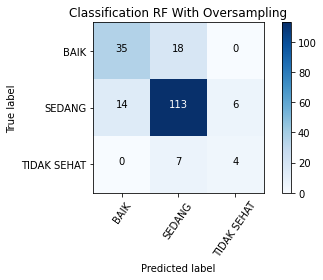

In [ ]:
cm = confusion_matrix(pred_rf_over, y_test)
cm_plot_label =['BAIK', 'SEDANG', 'TIDAK SEHAT']
plot_confusion_matrix(cm, cm_plot_label, title ='Classification RF With Oversampling')

Naive Bayes Tanpa Oversampling

Cross Validation

In [ ]:
scores = cross_val_score(model_rf, x, y, cv=10, scoring='accuracy')
print(scores)
print(scores.mean())

[0.83333333 0.86363636 0.6969697  0.81818182 0.83333333 0.78787879
 0.61538462 0.64615385 0.66153846 0.70769231]
0.7464102564102564


In [ ]:
scores = cross_val_score(model_rf_over, x, y, cv=10, scoring='accuracy')
print(scores)
print(scores.mean())

[0.77272727 0.87878788 0.6969697  0.83333333 0.83333333 0.78787879
 0.61538462 0.63076923 0.66153846 0.72307692]
0.7433799533799534
